# **Load the tabular data**

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the featured dataset

import pandas as pd

data_path = '/content/drive/MyDrive/Colab Data/ai_in_rehab_2025_tutorial/'
load_path = data_path + 'features_df_10s_3s.csv'

features_df = pd.read_csv(load_path)
print(f"Loaded features_df from {load_path}")
print(features_df.shape)
features_df.head()


Loaded features_df from /content/drive/MyDrive/Colab Data/ai_in_rehab_2025_tutorial/features_df_10s_3s.csv
(8403, 64)


,subject,activity,trial,window,acc_x_mean,acc_x_std,acc_x_ptp,acc_x_skew,acc_x_kurtosis,acc_x_max,...,gyro_z_mean,gyro_z_std,gyro_z_ptp,gyro_z_skew,gyro_z_kurtosis,gyro_z_max,gyro_z_min,gyro_z_rms,gyro_z_dom_freq,gyro_z_dom_power
0,sub_1,downstairs,dws_2,0,-0.023998,0.283579,2.313090,-0.389540,2.053978,1.087611,...,0.200601,0.702851,4.235752,0.401193,0.628829,2.484049,-1.751703,0.730917,1.0,7731.701629
1,sub_1,downstairs,dws_2,1,-0.031795,0.272414,2.094176,-0.362455,1.670366,0.868698,...,0.172241,0.637546,3.888201,-0.066714,0.607222,2.102682,-1.785519,0.660403,2.5,3244.326669
2,sub_1,downstairs,dws_2,2,-0.034379,0.269779,2.094176,-0.439600,2.064346,0.868698,...,0.202481,0.682044,4.078817,0.223416,0.457288,2.293299,-1.785519,0.711465,1.0,6322.854542
3,sub_1,downstairs,dws_2,3,-0.043502,0.250859,1.744506,-0.026250,0.722650,0.726684,...,0.166020,0.594518,4.078817,0.101985,1.195871,2.293299,-1.785519,0.617263,2.0,2660.482244
4,sub_1,downstairs,dws_2,4,-0.042466,0.251274,1.744506,-0.124765,0.810124,0.726684,...,0.204300,0.623529,3.760722,0.380127,0.777102,2.293299,-1.467423,0.656145,1.0,5630.895696


# **Train data (creating a classification model)**




Accuracy: 99.99%
Precision: 99.98%
Recall: 99.99%
Balanced Accuracy: 99.99%
F1 Score: 99.99%


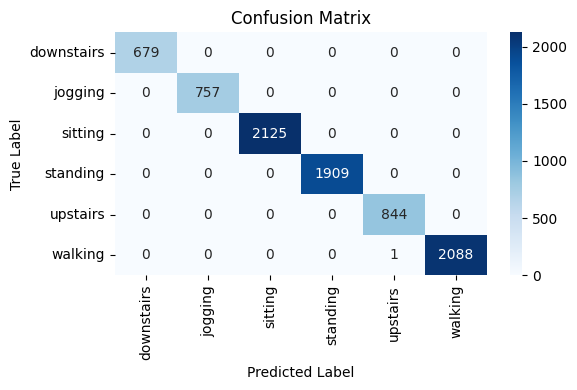

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


"""
Preparing data
"""

# Encode labels (activity) into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(features_df['activity'])

# Extract features and convert to numpy array
X = features_df.drop(['activity', 'subject', 'trial'], axis=1).to_numpy()

# Store subject info
subjects = features_df['subject'].to_numpy()

"""
Training the model
"""

# Creating an object of the model with set hyper-parameters
model = RandomForestClassifier(
    n_estimators=10,      # number of trees
    max_depth=None,       # or set e.g. max_depth=10
    random_state=42
)

# Training the model on the data
model.fit(X, y)

"""
Evaluation of the model
"""

# Predict labels
y_pred = model.predict(X)

# Compute metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')

# Print metrics
print(f'Accuracy: {100*accuracy:.2f}%')
print(f'Precision: {100*precision:.2f}%')
print(f'Recall: {100*recall:.2f}%')
print(f'Balanced Accuracy: {100*balanced_accuracy:.2f}%')
print(f'F1 Score: {100*f1:.2f}%')

"""
Create confusion matrix
"""

conf_matrix = confusion_matrix(y, y_pred)

# Recover original class labels from the encoder
class_labels = label_encoder.classes_

# Create a small confusion matrix figure
plt.figure(figsize=(6, 4))  # adjust size as needed (width, height)
sns.heatmap(conf_matrix,
            annot=True,         # show numbers
            fmt='d',            # integer format
            cmap='Blues',       # color map
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # ensures labels fit well
plt.show()


## Why so perfect? Do we actually have a perfect classifier?

# **Test data**

Accuracy: 93.27%
Precision: 92.48%
Recall: 93.11%
Balanced Accuracy: 93.11%
F1 Score: 92.63%


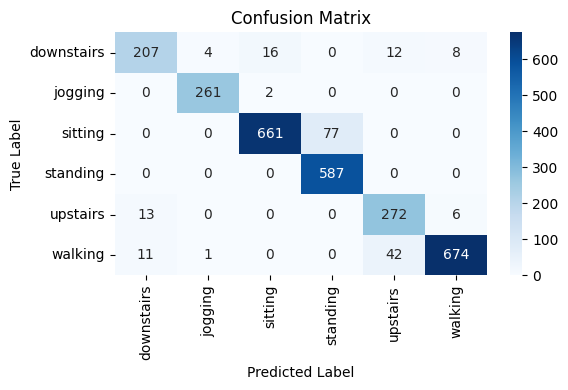

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit


# # [Option 1]
# # Split the dataset into fixed training and test sets (based on labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# [Option 2]
# Split the dataset into fixed training and test sets (based on subjects)
splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=subjects))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


"""
Training the model
"""

# Creating an object of the model with set hyper-parameters
model = RandomForestClassifier(
    n_estimators=10,       # number of trees
    max_depth=None,        # or set e.g. max_depth=10
    n_jobs=-1,
    random_state=42
)

# Training the model on the train data
model.fit(X_train, y_train)


"""
Testing the model on test data
"""

# Predict test labels
y_pred = model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Print metrics
print(f'Accuracy: {100*accuracy:.2f}%')
print(f'Precision: {100*precision:.2f}%')
print(f'Recall: {100*recall:.2f}%')
print(f'Balanced Accuracy: {100*balanced_accuracy:.2f}%')
print(f'F1 Score: {100*f1:.2f}%')


"""
Create confusion matrix
"""

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = label_encoder.classes_   # original string labels

# Create a small confusion matrix figure
plt.figure(figsize=(6, 4))  # adjust size as needed (width, height)
sns.heatmap(conf_matrix,
            annot=True,         # show numbers
            fmt='d',            # integer format
            cmap='Blues',       # color map
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # ensures labels fit well
plt.show()

# **Validation data (hyper-parameter tuning)**
Complement the lists of 'n_estimators', and 'max_depth' for hyper-par tuning.

In [7]:
# # [Option 1]
# # Split the dataset into fixed training and test sets (based on labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# [Option 2]
# Split the dataset into fixed training and test sets (based on subjects)
splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=subjects))
X_train_full, X_test = X[train_idx], X[test_idx]
y_train_full, y_test = y[train_idx], y[test_idx]
subjects_train_full = subjects[train_idx]  # subjects for the training subset

# Split the training data into training and validation sets (also by subjects)
splitter_val = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx2, val_idx = next(splitter_val.split(X_train_full, y_train_full, groups=subjects_train_full))
X_train, X_val = X_train_full[train_idx2], X_train_full[val_idx]
y_train, y_val = y_train_full[train_idx2], y_train_full[val_idx]
subjects_train, subjects_val = subjects_train_full[train_idx2], subjects_train_full[val_idx]


"""
Hyperparameter tuning on validation data (based on F1-macro)
"""

best_score = 0
best_params = {}

for n_estimators in []:       # <------------------------------------------------------------------- Complement
    for max_depth in [None]:       # <---------------------------------------------------------------Complement
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        val_f1 = f1_score(y_val, y_val_pred, average='macro')
        if val_f1 > best_score:
            best_score = val_f1
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

print("Best hyperparameters found on validation set (based on F1-macro):")
print(best_params)
print(f"Validation F1-macro: {100*best_score:.2f}%\n")

"""
Training the model on the combined training + validation data
"""

model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Combine training and validation sets for final model
X_train_final = np.concatenate([X_train, X_val])
y_train_final = np.concatenate([y_train, y_val])

# Training the model on the train data
model.fit(X_train_final, y_train_final)

"""
Testing the model on test data
"""

y_pred = model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Print metrics
print(f'Accuracy: {100*accuracy:.2f}%')
print(f'Precision: {100*precision:.2f}%')
print(f'Recall: {100*recall:.2f}%')
print(f'Balanced Accuracy: {100*balanced_accuracy:.2f}%')
print(f'F1 Score: {100*f1:.2f}%')

"""
Create confusion matrix
"""

conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = label_encoder.classes_   # original string labels
# Create a small confusion matrix figure
plt.figure(figsize=(6, 4))  # adjust size as needed (width, height)
sns.heatmap(conf_matrix,
            annot=True,         # show numbers
            fmt='d',            # integer format
            cmap='Blues',       # color map
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # ensures labels fit well
plt.show()


# **Cross validation (train and test)**

Fold 1 — Accuracy: 91.71%, Precision: 89.47%, Recall: 91.44%, Balanced Accuracy: 91.44%, F1-macro: 90.08%
Fold 2 — Accuracy: 96.50%, Precision: 94.27%, Recall: 94.80%, Balanced Accuracy: 94.80%, F1-macro: 94.48%
Fold 3 — Accuracy: 98.05%, Precision: 96.69%, Recall: 97.94%, Balanced Accuracy: 97.94%, F1-macro: 97.20%
Fold 4 — Accuracy: 95.67%, Precision: 96.44%, Recall: 96.27%, Balanced Accuracy: 96.27%, F1-macro: 96.20%
Fold 5 — Accuracy: 98.62%, Precision: 98.29%, Recall: 97.76%, Balanced Accuracy: 97.76%, F1-macro: 97.99%
Overall: 
	Accuracy: 96.11% ± 2.44%, 
	Precision: 95.03% ± 3.06%, 
	Recall: 95.64% ± 2.39%, 
	Balanced Accuracy: 95.64% ± 2.39%, 
	F1-macro: 95.19% ± 2.81%


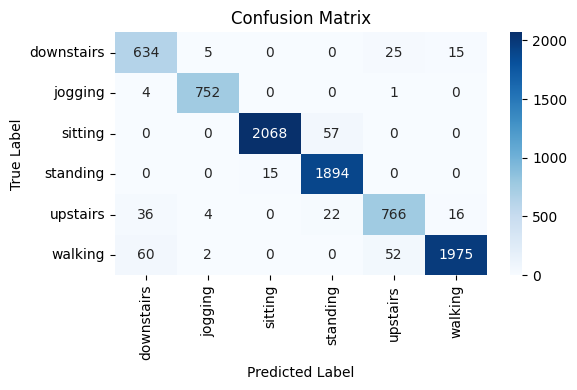

In [8]:
from sklearn.model_selection import GroupKFold


"""
Cross-validation (subject-based, 5 folds)
"""

# Set up group-based cross-validation (split by subjects)
cv = GroupKFold(n_splits=5)

# Arrays to store results for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
balanced_accuracy_scores = []
f1_scores = []

# Arrays to store predictions for each fold
y_true_all = []
y_pred_all = []

# Loop through the cross-validation splits
for fold, (train_index, test_index) in enumerate(cv.split(X, y, groups=subjects), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Creating an object of the model with set hyper-parameters
    model = RandomForestClassifier(
        n_estimators=10,       # number of trees
        max_depth=None,        # or set e.g. max_depth=10
        n_jobs=-1,
        random_state=42
    )

    # Training the model using the train data in the current fold
    model.fit(X_train, y_train)

    # Evaluate the model using the test data in the current fold
    y_pred = model.predict(X_test)

    y_true_all.extend(y_test)  # Store true labels for the current fold
    y_pred_all.extend(y_pred)  # Store predicted labels for the current fold

    # Calculate classification metrics for this split
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    balanced_accuracy_scores.append(balanced_accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    print(
        f"Fold {fold} — "
        f"Accuracy: {100*accuracy_scores[-1]:.2f}%, "
        f"Precision: {100*precision_scores[-1]:.2f}%, "
        f"Recall: {100*recall_scores[-1]:.2f}%, "
        f"Balanced Accuracy: {100*balanced_accuracy_scores[-1]:.2f}%, "
        f"F1-macro: {100*f1_scores[-1]:.2f}%"
    )

print(
    f"Overall: "
    f"\n\tAccuracy: {100*np.mean(accuracy_scores):.2f}% ± {100*np.std(accuracy_scores):.2f}%, "
    f"\n\tPrecision: {100*np.mean(precision_scores):.2f}% ± {100*np.std(precision_scores):.2f}%, "
    f"\n\tRecall: {100*np.mean(recall_scores):.2f}% ± {100*np.std(recall_scores):.2f}%, "
    f"\n\tBalanced Accuracy: {100*np.mean(balanced_accuracy_scores):.2f}% ± {100*np.std(balanced_accuracy_scores):.2f}%, "
    f"\n\tF1-macro: {100*np.mean(f1_scores):.2f}% ± {100*np.std(f1_scores):.2f}%"
)


"""
Create confusion matrix for all folds aggregated
"""

conf_matrix = confusion_matrix(y_true_all, y_pred_all)
class_labels = label_encoder.classes_   # original string labels

# Create a small confusion matrix figure
plt.figure(figsize=(6, 4))  # adjust size as needed (width, height)
sns.heatmap(conf_matrix,
            annot=True,         # show numbers
            fmt='d',            # integer format
            cmap='Blues',       # color map
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # ensures labels fit well
plt.show()


# **Nested cross validation (test and validation in loops)**

Outer Fold 1 — Best Params: {'max_depth': 10, 'n_estimators': 50}, Inner Mean F1: 97.86%
Outer Fold 1 — Accuracy: 96.06%, Precision: 94.95%, Recall: 96.37%, Balanced Accuracy: 96.37%, F1-macro: 95.50%
Outer Fold 2 — Best Params: {'max_depth': None, 'n_estimators': 50}, Inner Mean F1: 96.44%
Outer Fold 2 — Accuracy: 97.65%, Precision: 95.99%, Recall: 95.99%, Balanced Accuracy: 95.99%, F1-macro: 95.98%
Outer Fold 3 — Best Params: {'max_depth': 10, 'n_estimators': 50}, Inner Mean F1: 96.24%
Outer Fold 3 — Accuracy: 99.43%, Precision: 99.24%, Recall: 99.08%, Balanced Accuracy: 99.08%, F1-macro: 99.15%
Outer Fold 4 — Best Params: {'max_depth': 10, 'n_estimators': 50}, Inner Mean F1: 96.77%
Outer Fold 4 — Accuracy: 96.07%, Precision: 97.10%, Recall: 96.62%, Balanced Accuracy: 96.62%, F1-macro: 96.71%
Outer Fold 5 — Best Params: {'max_depth': 10, 'n_estimators': 50}, Inner Mean F1: 95.79%
Outer Fold 5 — Accuracy: 98.56%, Precision: 98.41%, Recall: 98.04%, Balanced Accuracy: 98.04%, F1-macro: 

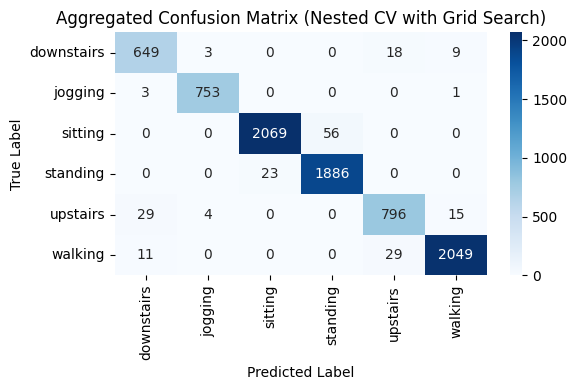

In [9]:
from sklearn.model_selection import GridSearchCV


"""
Nested Cross-Validation (subject-based)
Outer loop: test set
Inner loop: hyperparameter tuning via GridSearchCV
"""

# Set up outer group-based cross-validation (split by subjects)
outer_cv = GroupKFold(n_splits=5)

# Arrays to store results for each outer fold
accuracy_scores = []
precision_scores = []
recall_scores = []
balanced_accuracy_scores = []
f1_scores = []

# Arrays to store predictions across outer folds
y_true_all = []
y_pred_all = []

# Define hyperparameter grid for RandomForest
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [None, 5, 10, 20]
}

# Outer CV loop
for outer_fold, (train_outer_idx, test_outer_idx) in enumerate(outer_cv.split(X, y, groups=subjects), start=1):
    X_train_outer, X_test_outer = X[train_outer_idx], X[test_outer_idx]
    y_train_outer, y_test_outer = y[train_outer_idx], y[test_outer_idx]
    subjects_train_outer = subjects[train_outer_idx]

    # Inner CV (for hyperparameter tuning) — also group-based
    inner_cv = GroupKFold(n_splits=3)

    # Define base model
    model = RandomForestClassifier(
        n_jobs=-1,
        random_state=42
    )

    # Grid search over the inner folds
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=inner_cv.split(X_train_outer, y_train_outer, groups=subjects_train_outer),
        n_jobs=-1
    )
    grid_search.fit(X_train_outer, y_train_outer)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Outer Fold {outer_fold} — Best Params: {best_params}, Inner Mean F1: {100*best_score:.2f}%")

    # Test best model on outer test data
    y_test_pred = best_model.predict(X_test_outer)

    y_true_all.extend(y_test_outer)
    y_pred_all.extend(y_test_pred)

    # Calculate metrics for this outer fold
    accuracy_scores.append(accuracy_score(y_test_outer, y_test_pred))
    precision_scores.append(precision_score(y_test_outer, y_test_pred, average='macro'))
    recall_scores.append(recall_score(y_test_outer, y_test_pred, average='macro'))
    balanced_accuracy_scores.append(balanced_accuracy_score(y_test_outer, y_test_pred))
    f1_scores.append(f1_score(y_test_outer, y_test_pred, average='macro'))

    print(
        f"Outer Fold {outer_fold} — "
        f"Accuracy: {100*accuracy_scores[-1]:.2f}%, "
        f"Precision: {100*precision_scores[-1]:.2f}%, "
        f"Recall: {100*recall_scores[-1]:.2f}%, "
        f"Balanced Accuracy: {100*balanced_accuracy_scores[-1]:.2f}%, "
        f"F1-macro: {100*f1_scores[-1]:.2f}%"
    )

print(
    f"Overall: "
    f"\n\tAccuracy: {100*np.mean(accuracy_scores):.2f}% ± {100*np.std(accuracy_scores):.2f}%, "
    f"\n\tPrecision: {100*np.mean(precision_scores):.2f}% ± {100*np.std(precision_scores):.2f}%, "
    f"\n\tRecall: {100*np.mean(recall_scores):.2f}% ± {100*np.std(recall_scores):.2f}%, "
    f"\n\tBalanced Accuracy: {100*np.mean(balanced_accuracy_scores):.2f}% ± {100*np.std(balanced_accuracy_scores):.2f}%, "
    f"\n\tF1-macro: {100*np.mean(f1_scores):.2f}% ± {100*np.std(f1_scores):.2f}%"
)


"""
Create confusion matrix for all outer folds aggregated
"""

conf_matrix = confusion_matrix(y_true_all, y_pred_all)
class_labels = label_encoder.classes_

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Aggregated Confusion Matrix (Nested CV with Grid Search)")
plt.tight_layout()
plt.show()


# Excercise!

Let's experiment on the last cell!
1) Add more options to the 'param_grid' for the hyper parameters. You can start with this:


```python
param_grid = {
    'n_estimators': [50, 100, 200],       # number of trees
    'max_depth': [None, 10, 20, 30],      # depth of each tree
    'min_samples_split': [2, 5, 10],      # minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],        # minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],     # number of features considered at each split
    'bootstrap': [True, False]            # whether bootstrap samples are used
}
```

Doing so you will notice how long it takes to do a nested cross validation with many hyper-parameters!

So, also replace 'GridSearchCV' with 'RandomizedSearchCV'. Here is an example:
```python
from sklearn.model_selection import RandomizedSearchCV

# Randomized search over the inner folds
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,   # same grid as before
    n_iter=20,                        # number of random combinations to try
    scoring='f1_macro',
    cv=inner_cv.split(X_train_outer, y_train_outer, groups=subjects_train_outer),
    n_jobs=-1,
    random_state=42
)
```

2) Make a similar nested CV pipeline including subject splits, and hyper-parameter tuning, with a classifier of your own choise (not Random Forest).